### Import Updated NBA Game Data


In [7]:
import pandas as pd
NBA_Games=pd.read_csv("../../Data/Week 2/NBA_Games2.csv")
NBA_Games.head()

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,...,STL,BLK,TOV,PF,PLUS_MINUS,GM,GA,POINT_DIFF,WIN,WIN.1
0,Chicago,Chicago Bulls,1610612741,Bulls,Illinois,1966,12013,CHI,11300002,2013-10-05,...,5,10,23,25,6.0,54,114,6.0,1,1
1,New Orleans,New Orleans Pelicans,1610612740,Pelicans,Louisiana,2002,12013,NOP,11300003,2013-10-05,...,12,4,15,32,1.0,74,136,1.0,1,1
2,Los Angeles,Los Angeles Lakers,1610612747,Lakers,California,1948,12013,LAL,11300004,2013-10-05,...,7,4,19,27,9.0,69,142,9.0,1,1
3,Denver,Denver Nuggets,1610612743,Nuggets,Colorado,1976,12013,DEN,11300006,2013-10-06,...,9,10,28,33,9.0,61,129,9.0,1,1
4,Chicago,Chicago Bulls,1610612741,Bulls,Illinois,1966,12013,CHI,11300007,2013-10-07,...,9,8,17,26,19.0,71,126,19.0,1,1


## More on Summary Statistics
### Central Tendency vs. Variation
We will compare the success rates of two-point field goals and three-point field goals to demonstrate the difference between central tendency and variation. 
#### Calculate summary statistics for the percentages of two-point field goals and three-point field goals
- Two-point field goals

In [8]:
NBA_Games['FG_PCT'].describe()

count    8889.000000
mean        0.477441
std         0.051469
min         0.259000
25%         0.442000
50%         0.477000
75%         0.512000
max         0.684000
Name: FG_PCT, dtype: float64

- Three-point field goals


In [9]:
NBA_Games['FG3_PCT'].describe()

count    8889.000000
mean        0.382416
std         0.096878
min         0.000000
25%         0.318000
50%         0.381000
75%         0.444000
max         0.842000
Name: FG3_PCT, dtype: float64

_We can see that the average success rate of 2-point field goals is about 45.27% while the average success rate of 3-point field goals is 35.07%. That means that the overall success rate of 2-point field goals is about 10% higher than the overall success rate of 3-point field goals. The median of 2-point field goal success rate is 45.20%, while the median 3-point field goal success rate is 35.00%. This means half of the teams have 2-point field-goal success rates less than 45% and half of the teams have 3-point field goal success rate of less than 35%._

_The standard deviation for 2-point field goal success rate is 0.056, while the standard deviation for 3-point field goal success rate is 0.09956. This means that there is a greater variation in 3-point field goals than 2-point field goals._ 

### Compare the distribution of two-point field goal percentage and three-point field goal percentage using a Histogram
#### Plot two histograms side by side
_The options "sharex" and "sharey" ask if we want to restrict the same range of x and same range of y for the two histograms_

array([[<AxesSubplot:title={'center':'FG_PCT'}>,
        <AxesSubplot:title={'center':'FG3_PCT'}>]], dtype=object)

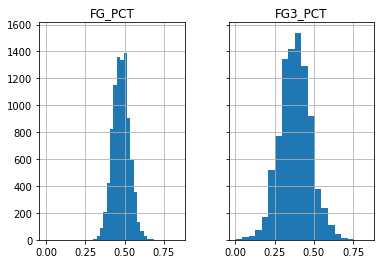

In [10]:
NBA_Games.hist(column=['FG_PCT','FG3_PCT'], bins=20, sharex=True, sharey=True)

#### Plot two histograms in the same graph in different colors

#### We will first introduce a new library "matplotlib" that provides more useful functions to make plots.
- We will use "plot.hist" instead of "hist" to make this plot
- The option "alpha" specifies transparency, so that the two histograms would not block each other entirely (alpha=0: fully transparent; alpha=1: fully opaque)
- We can also add a title and axis labels using "plt.title," "plt.xlabel" and "plt.ylabel" commands
- We can also export the graph as a png file using the "plt.savefig" command

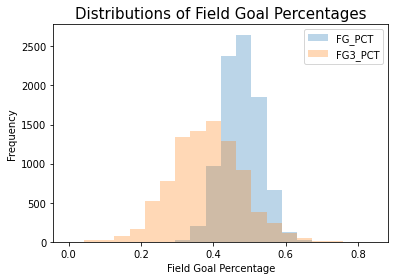

In [11]:
import matplotlib.pyplot as plt

NBA_Games[['FG_PCT','FG3_PCT']].plot.hist(alpha=0.3, bins=20)
plt.xlabel('Field Goal Percentage')
plt.ylabel('Frequency')
plt.title("Distributions of Field Goal Percentages", fontsize=15)
plt.savefig('FG_PCT_Distributions.png')

#### Histogram by the result of the game using the "by" option
_We can also change the colors of the graphs using the "color" option_

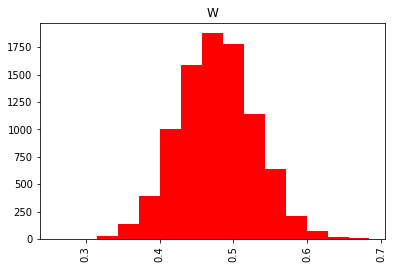

In [12]:
NBA_Games.hist(by='WL', column='FG_PCT', color='red', bins=15, sharex=True, sharey=True)
plt.savefig('FG_PCT_WL.png')

## Self Test - 1
1. Calculate summary statistics for the three-point field goal percentage by the result of the game
2. Graph a histogram of the three-point field goal percentage by the result of the game and provide interpretation
- Number of bins=10, the two subgraphs should have the same x and y ranges, color is green
- Export the graph as "FG3_PCT_Distribution" in png format

In [13]:
#Your Code Here

### Create time series graphs
Let's first change the data type of "GAME_DATE" from object to datetime.

In [14]:
import datetime
NBA_Games['GAME_DATE']=pd.to_datetime(NBA_Games['GAME_DATE'])
NBA_Games['GAME_DATE'].head()

0   2013-10-05
1   2013-10-05
2   2013-10-05
3   2013-10-06
4   2013-10-07
Name: GAME_DATE, dtype: datetime64[ns]

### Subsetting a dataset
#### The dataset we are working with contains games of different NBA teams. Let's focus on one team to produce a time series graph.
Extract Pistons' game data in the 2017-2018 season.

_Note that for date variable, we can use the >, =, < operators. When we specify the condition of the date, we need to use ""_

In [15]:
Pistons_Games=NBA_Games[(NBA_Games.NICKNAME == 'Pistons')&(NBA_Games.SEASON_ID==22017)& (NBA_Games.GAME_DATE>='2017-10-17')]
display(Pistons_Games)

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,...,STL,BLK,TOV,PF,PLUS_MINUS,GM,GA,POINT_DIFF,WIN,WIN.1
5459,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700003,2017-10-18,...,14,3,8,21,12.0,61,134,12.0,1,1
5485,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700030,2017-10-21,...,5,2,12,25,4.0,67,136,4.0,1,1
5509,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700056,2017-10-25,...,7,3,14,22,21.0,74,143,21.0,1,1
5542,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700091,2017-10-29,...,16,0,13,9,8.0,72,137,8.0,1,1
5568,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700119,2017-11-03,...,10,4,12,11,9.0,68,132,9.0,1,1
5580,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700132,2017-11-04,...,10,3,14,19,9.0,68,125,9.0,1,1
5605,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700159,2017-11-08,...,3,5,15,22,17.0,71,135,17.0,1,1
5615,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700169,2017-11-10,...,7,5,17,18,7.0,72,146,7.0,1,1
5633,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700189,2017-11-12,...,2,5,13,17,9.0,70,135,9.0,1,1
5679,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700238,2017-11-19,...,10,2,19,21,3.0,61,128,3.0,1,1


#### Now we can plot the points earned by the Pistons by time. 


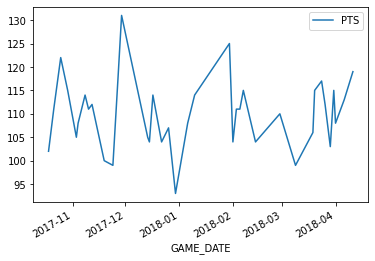

In [16]:
Pistons_Games.plot(x='GAME_DATE', y='PTS')
plt.savefig('PISTONS_PTS_TIME.png')

## Self Test - 2
1. Graph Toronto Raptors' points in each game throughout the 2018-2019 seaon. 
(SEASON ID is 22018, and the regular season started on October 16, 2018.)
2. Export the graph as "RAPTORS_PTS_TIME" in png format

In [17]:
#Your Code Here

## Correlation Analysis
### We can first detect the relationship between two variables in a scatterplot.
#### Let's use the number of assists and the number of field goals made as an example.
We can create a scatter plot using the "plot.scatter" function with the number of assists in the horizontal axis and the number of field goals made in the vertical axis.

<AxesSubplot:xlabel='AST', ylabel='FGM'>

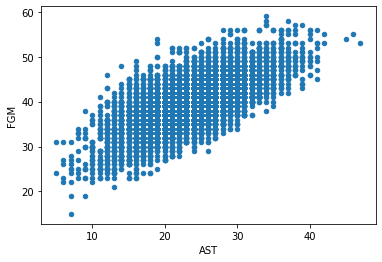

In [18]:
NBA_Games.plot.scatter(x='AST', y='FGM')

#### We can use the functions in the "seaborn" library to graph the relationships between two variables

#### We will use the function "regplot" to graph the two variables. This function graphs a scatterplot as well as a regression line.
_We will learn about regression analysis more systematically in week 4_


Text(0.5, 1.0, 'Relationship between the Numbers of Assists and Field Goals Made')

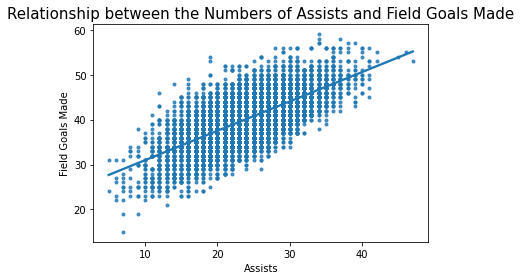

In [19]:
import seaborn as sns
sns.regplot(x='AST', y='FGM', data=NBA_Games,  marker='.')
plt.xlabel('Assists')
plt.ylabel('Field Goals Made')
plt.title("Relationship between the Numbers of Assists and Field Goals Made", fontsize=15)

_As we can see from the graph, as the number of assists increase, the number of field goals made also increases. In this case, we say there is a positive relationship between the two variables, or a positive correlation._ 



### Correlation Coefficient
#### We can quantify the linear correlation by a correlation coefficient. A correlation coefficient measures the joint variability of two random variables.  We can calculate correlation coefficient using the "corr" function.


In [20]:
NBA_Games['AST'].corr(NBA_Games['FGM'])

0.6752487527818373

_The correlation coefficient between the number of assist and field goal made is 0.70 so there is a positive correlation between the two._ 

#### Let's investigate the relationship between the number of assists and the number of field goals attempted.


In [ ]:
sns.regplot(x='AST', y='FGA', data=NBA_Games,  marker='.')
plt.xlabel('Assists')
plt.ylabel('Field Goals Attempted')
plt.title("Relationship between the Numbers of Assists and Field Goals Attempted", fontsize=15)

In [ ]:
NBA_Games['AST'].corr(NBA_Games['FGA'])

_Both the graph and the correlation coefficient suggest that there is only a slight positive relationship between the two._


### We can further graph the scatter plot by group using the "hue" option.
#### Let's separate by the results of the game (win or lose), and produce scatter plots between number of assists and field goals made.
_In this case, we can use lmplot() instead of regplot()._ 
- lmplot() combines regplot() and FacetGrid.
- FacetGrid produces multi-plot grid for plotting conditional relationships. Thus, FacetGrid allows us to separate the dataset into multiple panels based on specified conditions to visualize the relationship between multiple variables. 

In [ ]:
sns.lmplot(x='AST', y='FGA', hue='WL', data=NBA_Games)
plt.xlabel('Assists')
plt.ylabel('Field Goals Made')
plt.title("Relationship between the Numbers of Assists and Field Goals Made", fontsize=15)

### We can also find correlation coefficients for all the numerical variables.
We will specify the method to be pearson. 


In [ ]:
NBA_Games.corr(method='pearson')